In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv("archive\Social_Network_Ads.csv")

In [259]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [260]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)


In [261]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [262]:
styler = df.head(10).style
# styler.background_gradient(cmap='bwr')
styler.highlight_min(color='lightblue')
styler.highlight_max(color='lightgreen')


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [263]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [264]:
df.duplicated().sum()

33

In [265]:
df.drop_duplicates(keep = 'last', inplace=True)

In [266]:
df.duplicated().sum()

0

In [267]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,367.000000,37.722071,10.681383,18.000000,29.500000,37.000000,46.000000,60.000000
EstimatedSalary,367.000000,70719.346049,34772.173908,15000.000000,43000.000000,71000.000000,89000.000000,150000.000000
Purchased,367.000000,0.376022,0.485047,0.000000,0.000000,0.000000,1.000000,1.000000


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [269]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [270]:
# correlation matrix
styler = df.corr().style
styler.highlight_between(left = -1, right = -0.85, color= 'red')
styler.highlight_between(left = 0.85, right = 1, color= 'red')

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


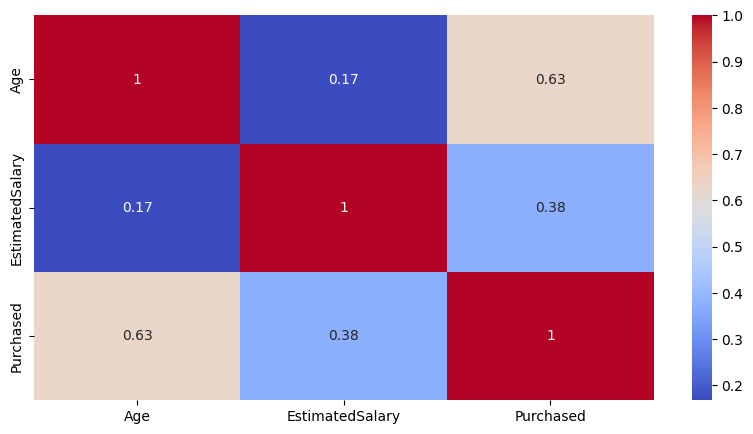

In [271]:
# heat matrix
import seaborn as sns
plt.figure(figsize=(10, 5))
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

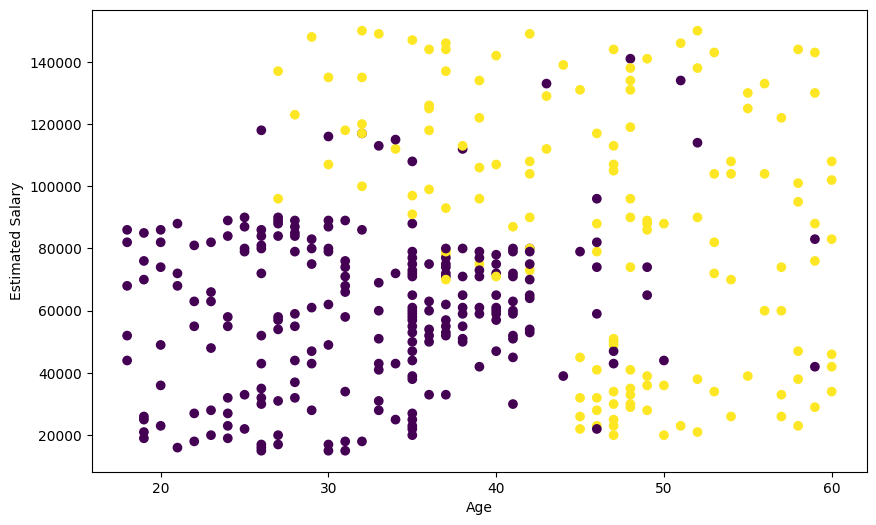

In [272]:
# considering Age and EstimatedSalary as x and y axis respectively and Purchased varible to differentiate between the two classes. draw graph
plt.figure(figsize = (10, 6))
plt.scatter(df['Age'], df['EstimatedSalary'], c = df['Purchased'])
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show() 

<div style="background-color: #006a4e; color:white; text-align:center"><font size = "5">Analyse the target variable</div>

In [295]:
# return the frequency of distinct values of the column Purchased
print(df['Purchased'].value_counts())
print(df.shape)

Purchased
0    229
1    138
Name: count, dtype: int64
(367, 3)


C:\Users\ratan\AppData\Local\Temp\ipykernel_15428\701809212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Purchased', palette = 'dark')


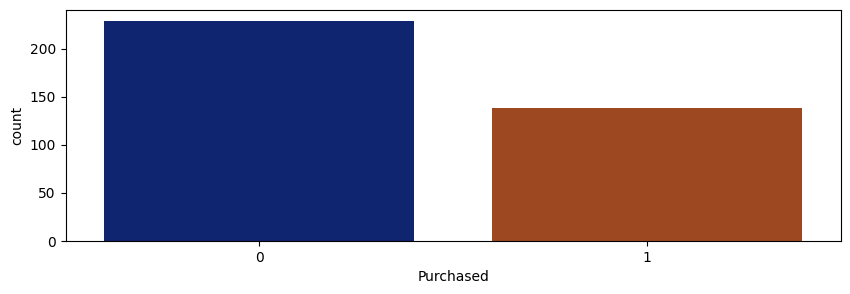

In [274]:
plt.figure(figsize = (10, 3))
sns.countplot(data = df, x = 'Purchased', palette = 'dark')
plt.show()

<div style="background-color:#006a4e; color: white">
according to above data, we can say that few people Purchase the product after seeing the ad and few people not purchase the product after seeing the ad.
</div>

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_df = scaler.fit_transform(df)

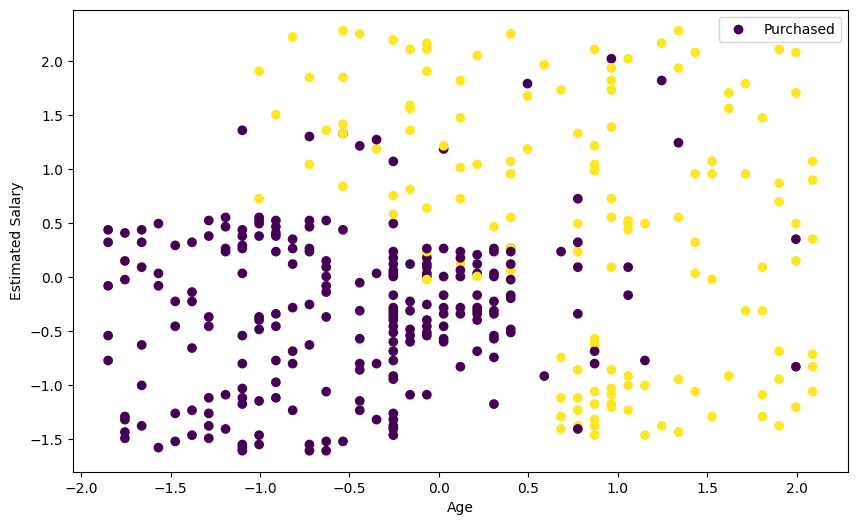

In [276]:
plt.figure(figsize = (10, 6))
# also used legend to differentiate between the two classes
plt.scatter(processed_df[:, 0], processed_df[:, 1], c = df['Purchased'], label = 'Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# lagend for the graph
plt.legend()
plt.show()

In [277]:
# considering Age and EstimatedSalary as features and Purchased as target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [278]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [279]:
x_train.describe().T.style.background_gradient(cmap='bwr')

,count,mean,std,min,25%,50%,75%,max
Age,293.000000,38.112628,10.696831,18.000000,29.000000,37.000000,47.000000,60.000000
EstimatedSalary,293.000000,70747.440273,35139.512094,15000.000000,43000.000000,70000.000000,89000.000000,150000.000000


In [280]:
# in column wise, min value gets highlighted in blue and max value gets highlighted in red
x_test.describe().T.style.background_gradient(cmap='bwr')

,count,mean,std,min,25%,50%,75%,max
Age,74.000000,36.175676,10.549762,18.000000,30.000000,35.000000,42.000000,59.000000
EstimatedSalary,74.000000,70608.108108,33510.095624,15000.000000,47750.000000,73000.000000,88750.000000,150000.000000


In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [282]:
x_train = sc.fit_transform(x_train)

In [283]:
x_test = sc.transform(x_test)

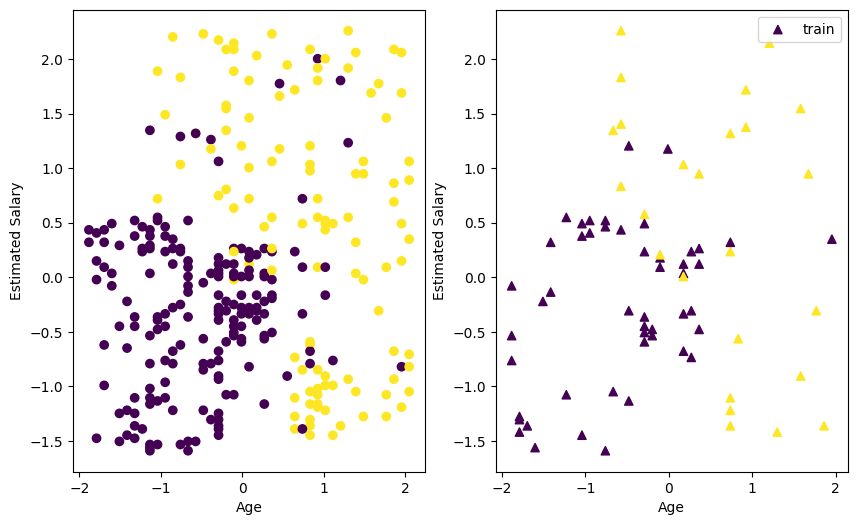

In [284]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].scatter(x_train[:, 0], x_train[:, 1], c = y_train)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')

ax[1].scatter(x_test[:, 0], x_test[:, 1], c = y_test, marker = '^')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend(['train', 'test'])

plt.show()



In [285]:
type(x_train)

numpy.ndarray

In [286]:
pd.DataFrame(x_train).describe()

,0,1
count,2.930000e+02,2.930000e+02
mean,-1.136747e-17,-3.182892e-17
std,1.001711e+00,1.001711e+00
min,-1.883458e+00,-1.589175e+00
25%,-8.533572e-01,-7.909874e-01
50%,-1.041927e-01,-2.130704e-02
75%,8.322630e-01,5.203199e-01
max,2.049655e+00,2.259227e+00


In [287]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [288]:
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [289]:
y_pred = classifier.predict(x_test)

In [290]:
classifier.score(x_test, y_pred)

1.0

In [291]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [292]:
cm

array([[45,  4],
       [ 3, 22]], dtype=int64)

In [293]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9054054054054054

In [294]:
# # visualizing the training set results
# from matplotlib.colors import ListedColormap
# x_set, y_set = sc.inverse_transform(x_train), y_train
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25), 
#                      np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

# plt.figure(figsize = (10, 6))
# plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), 
#              cmap = ListedColormap(('red', 'green')), alpha = 0.5)
# plt.scatter(x_set[:, 0], x_set[:, 1], c = y_set, cmap = ListedColormap(('red', 'green')))
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# # visualizing the test set results
# from matplotlib.colors import ListedColormap
# x_set, y_set = sc.inverse_transform(x_test), y_test
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25), 
#                      np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

# plt.figure(figsize = (10, 6))
# plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), 
#              cmap = ListedColormap(('red', 'green')), alpha = 0.5)

# plt.scatter(x_set[:, 0], x_set[:, 1], c = y_set, cmap = ListedColormap(('red', 'green')), marker = '^')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()